# Outliers

An **Outlier** is an observation which deviates **"too much"** from other observations.

They are the data points that don't fall within our statistical model.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## The Box-and-Whisker Plot

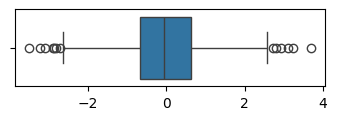

In [3]:
data = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(4, 1))
sns.boxplot(data, orient='h')
plt.show()

<img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png">

### When to use Boxplot?

Box-and-whisker plots are especially helpful for **comparing distributions**:

In [4]:
df_penguins = sns.load_dataset('penguins')
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

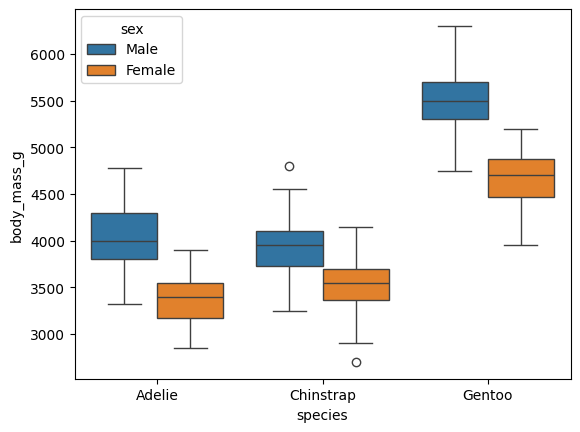

In [5]:
sns.boxplot(data=df_penguins, x='species', y='body_mass_g', hue='sex')

## Example: Extreme House Prices!

In [6]:
df_house_prices = pd.read_csv('../datasets/house_prices/HousePrices.csv')
df_house_prices.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


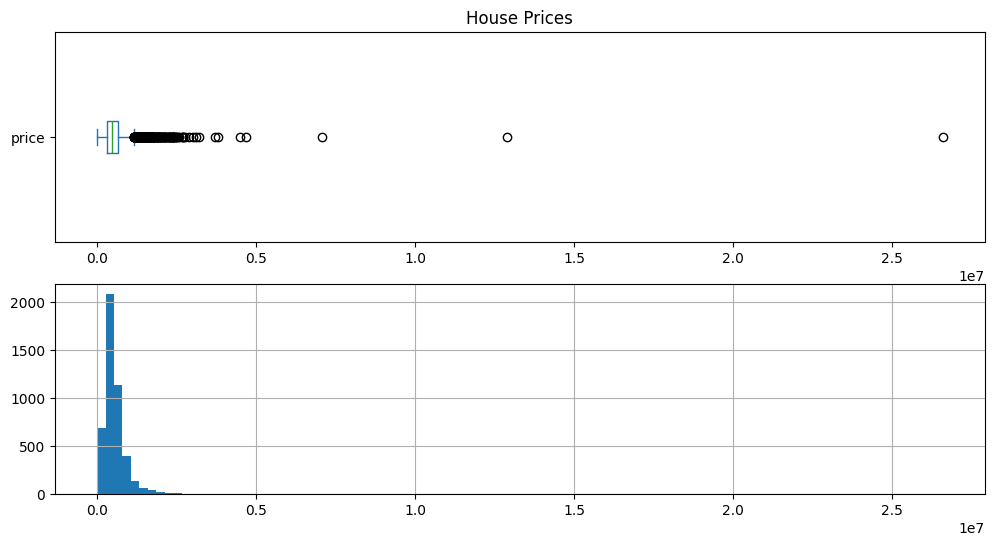

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
df_house_prices['price'].plot.box(ax=ax.flat[0], title="House Prices", vert=False)
df_house_prices['price'].hist(ax=ax.flat[1], bins=100);

### Methods of Removing Outliers

- Simple models need normally distributed observations.
- Outliers can have an outsized impact on statistics including mean and correlation.

We'll explore two methods that define how much is **"too much"**, when considering an outlier as such:

- **A. IQR**
- **B. z-score**


![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

Figure: Box plot and probability density function of a normal distribution $N(0, σ^2)$. Source: https://en.wikipedia.org/wiki/Probability_density_function

### A. Remove outliers using the z-score method

Assuming normally-distributed data, a *z-score* indicates how many standard deviations away from the mean a data point (say, $x$) is: 

$$ z = \frac{x-\mu}{\sigma} $$

A data point that lies further than three standard deviations from the mean is considered to be an *outlier*. i.e., if $|z_i| > 3$, then $x_i$ is an outlier.

Here's an example code snippet to remove outliers using the z-score method:

In [8]:
df = df_house_prices

In [9]:
df['price'].min(), df['price'].max()

(np.float64(0.0), np.float64(26590000.0))

In [10]:
stats.zscore(df['price']).min(), stats.zscore(df['price']).max()

(np.float64(-0.9790511150522764), np.float64(46.18528724257905))

In [11]:
# Outliers data points based on price being further than 3 standard deviations away from the mean
threshold = 3
outliers_z = df[np.abs(stats.zscore(df['price'])) > threshold]
df_z = df[np.abs(stats.zscore(df['price'])) <= threshold]

In [12]:
# minimum outlier price
outlier_z_min = outliers_z['price'].min()
outlier_z_min

np.float64(2250000.0)

In [13]:
df_z[df_z['price'] >= outlier_z_min]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [14]:
len(df), len(df_z), len(outliers_z)

(4600, 4566, 34)

### B. Remove outliers using the IQR method

By convention, a data point may be considered to be an outlier if it lies outside of the interquartile range (IQR) by more than 1.5 times the IQR. i.e., if $x_i < Q_1 - 1.5 \times \text{IQR}$ or $x_i > Q_3 + 1.5 \times \text{IQR}$, then $x_i$ is an outlier.

In [15]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold value
threshold = 1.5

# Identify and remove outliers
outliers_iqr = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]
df_iqr = df[(df['price'] >= Q1 - threshold * IQR) & (df['price'] <= Q3 + threshold * IQR)]

In [16]:
# minimum outlier price
outlier_iqr_min = outliers_iqr['price'].min()
outlier_iqr_min

np.float64(1157200.0)

In [17]:
# compare the two
print(f'Outlier min price using z-score: {outlier_z_min}')
print(f'Outlier min price using IQR:     {outlier_iqr_min}')

Outlier min price using z-score: 2250000.0
Outlier min price using IQR:     1157200.0


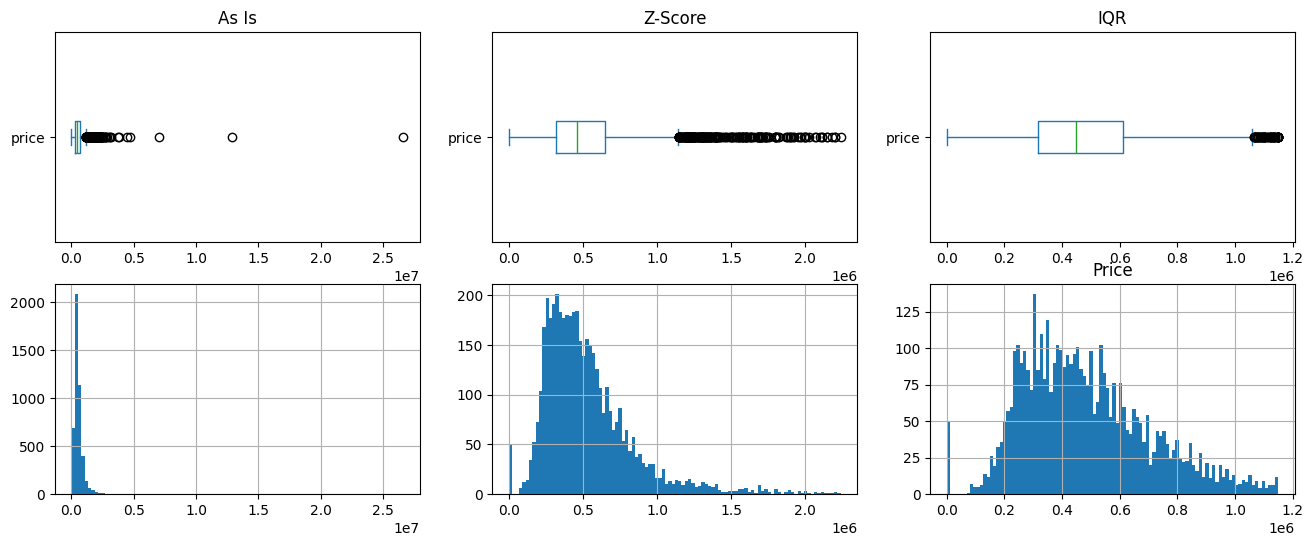

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 6))

df_house_prices['price'].plot.box(ax=ax.flat[0], title="As Is", vert=False)
df_z['price'].plot.box(ax=ax.flat[1], vert=False, title="Z-Score")
df_iqr['price'].plot.box(ax=ax.flat[2], title="IQR", vert=False)

df_house_prices['price'].hist(ax=ax.flat[3], bins=100);
df_z['price'].hist(ax=ax.flat[4], bins=100, );
df_iqr['price'].hist(ax=ax.flat[5], bins=100);

> If you are wondering how to deal with **data that won't yield to either Z-score or IQR methods**, check out the [normalize.ipynb](../techniques/normalize.ipynb) file.
